In [27]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'21',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '9cc465c6-9b20-4e42-b9a8-6ce929f9c283',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-09-09T13:04:54.700Z', 'error_code': 0, 'error_message': None, 'elapsed': 39, 'credit_count': 1, 'notice': None, 'total_count': 9863}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11672, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
type(data)

dict

In [17]:
import pandas as pd


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [29]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975189e+07,1.975189e+07,False,NaN,1,NaN,NaN,NaN,2024-09-09T13:03:00.000Z,55280.389750,2.414417e+10,50.2903,0.050881,2.002451,-5.383288,-8.999408,-6.082022,-17.394892,1.091892e+12,55.7047,1.160888e+12,NaN,2024-09-09T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
1,1027,Ethereum,ETH,ethereum,9266,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203239e+08,1.203239e+08,True,NaN,2,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,2310.720543,1.291870e+10,35.5700,-0.220481,1.572137,-8.398289,-12.181142,-27.481753,-34.520252,2.780350e+11,14.1844,2.780350e+11,NaN,2024-09-09T13:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
2,825,Tether USDt,USDT,tether,96627,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.181954e+11,1.202409e+11,True,NaN,3,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,1.000148,4.067989e+10,35.5806,0.031995,-0.021067,0.014802,0.001793,0.002752,0.064923,1.182129e+11,6.0306,1.202587e+11,NaN,2024-09-09T13:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-09 20:04:57.781641
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459344e+08,1.459344e+08,False,NaN,4,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,505.682512,1.420137e+09,7.5416,0.055610,1.566631,-2.619756,-1.963329,-5.618109,-16.789516,7.379649e+10,3.7656,7.379649e+10,NaN,2024-09-09T13:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.676413e+08,5.841402e+08,True,NaN,5,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,129.243086,1.592610e+09,30.6245,-0.147281,0.326911,-2.082570,-16.399042,-10.051656,-15.826834,6.043941e+10,3.0840,7.549608e+10,NaN,2024-09-09T13:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
5,3408,USDC,USDC,usd-coin,21878,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.510359e+10,3.510359e+10,False,NaN,6,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,1.000133,4.613651e+09,58.2629,0.030532,-0.022607,0.006518,0.015991,-0.010259,-0.006825,3.510827e+10,1.7911,3.510827e+10,NaN,2024-09-09T13:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-09 20:04:57.781641
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.632938e+10,9.998727e+10,False,NaN,7,NaN,NaN,NaN,2024-09-09T13:03:00.000Z,0.530776,6.692748e+08,40.4632,-0.103004,0.864044,-4.365665,-11.694317,17.614118,9.985363,2.989829e+10,1.5252,5.307761e+10,NaN,2024-09-09T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.458845e+11,1.458845e+11,True,NaN,8,NaN,NaN,NaN,2024-09-09T13:03:00.000Z,0.098104,4.703620e+08,27.1374,0.214865,3.128671,0.807599,-5.890051,-11.774585,-29.950707,1.431181e+10,0.7301,1.431181e+10,NaN,2024-09-09T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.672481e+10,8.672488e+10,Tru

In [167]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'21',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9cc465c6-9b20-4e42-b9a8-6ce929f9c283',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df,df_append])
    df

    if not os.path.isfile(r"D:\ye\crypto api automation\API.csv"):
        df.to_csv(r"D:\ye\crypto api automation\API.csv", header = 'column_names')
    else:
        df.to_csv(r"D:\ye\crypto api automation\API.csv", mode = 'a', header=False)
        
    

In [65]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API runner completed')
    sleep(60) #running in 1 minute intervals
exit()

API runner completed
API runner completed
API runner completed


KeyboardInterrupt: 

In [67]:
df15 = pd.read_csv(r"D:\ye\crypto api automation\API.csv")
df15

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.975189e+07,1.975189e+07,False,NaN,1,NaN,NaN,NaN,2024-09-09T14:03:00.000Z,55644.616320,2.538458e+10,58.0237,0.658871,2.317882,-4.391134,-8.026546,-5.114095,-16.690828,1.099086e+12,55.8035,1.168537e+12,NaN,2024-09-09T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:03:56.953902
1,1,1027,Ethereum,ETH,ethereum,9266,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203239e+08,1.203239e+08,True,NaN,2,NaN,NaN,NaN,2024-09-09T14:02:00.000Z,2317.433181,1.312400e+10,35.6415,0.290500,1.422874,-7.509244,-11.263330,-27.130790,-34.217709,2.788427e+11,14.1576,2.788427e+11,NaN,2024-09-09T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:03:56.953902
2,2,825,Tether USDt,USDT,tether,96631,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.181954e+11,1.202409e+11,True,NaN,3,NaN,NaN,NaN,2024-09-09T14:02:00.000Z,1.000123,4.192288e+10,39.4203,-0.002498,0.013734,0.025410,-0.017767,-0.011178,0.073879,1.182100e+11,5.9986,1.202557e+11,NaN,2024-09-09T14:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-09 21:03:56.953902
3,3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459344e+08,1.459344e+08,False,NaN,4,NaN,NaN,NaN,2024-09-09T14:02:00.000Z,507.424636,1.434275e+09,7.9444,0.344509,1.492442,-2.061604,-0.995893,-6.013363,-16.380192,7.405072e+10,3.7621,7.405072e+10,NaN,2024-09-09T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:03:56.953902
4,4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.676413e+08,5.841401e+08,True,NaN,5,NaN,NaN,NaN,2024-09-09T14:02:00.000Z,129.707455,1.664649e+09,34.4424,0.359299,0.553572,-0.901870,-15.283817,-8.909298,-14.174307,6.065656e+10,3.0816,7.576733e+10,NaN,2024-09-09T14:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:03:56.953902
5,5,3408,USDC,USDC,usd-coin,21878,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.508525e+10,3.508525e+10,False,NaN,6,NaN,NaN,NaN,2024-09-09T14:02:00.000Z,0.999998,4.822109e+09,64.9232,-0.013525,-0.015993,0.002732,-0.000915,-0.011732,-0.003766,3.508518e+10,1.7814,3.508518e+10,NaN,2024-09-09T14:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-09 21:03:56.953902
6,6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.632938e+10,9.998727e+10,False,NaN,7,NaN,NaN,NaN,2024-09-09T14:03:00.000Z,0.532723,6.873493e+08,43.7040,0.366747,1.008016,-3.670142,-10.557836,18.374545,10.822207,3.000794e+10,1.5228,5.327227e+10,NaN,2024-09-09T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:03:56.953902
7,7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.458852e+11,1.458852e+11,True,NaN,8,NaN,NaN,NaN,2024-09-09T14:03:00.000Z,0.098202,4.793092e+08,30.2017,0.100402,3.120620,1.518731,-5.229035,-11.083854,-29.023722,1.432625e+10,0.7274,1.432625e+10,NaN,2024-09-09T14:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:03:56.953902
8,8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.975189e+07,1.975189e+07,False,NaN,1,NaN,NaN,NaN,2024-09-09T13:03:00.000Z,55280.389750,2.414417e+10,50.2903,0.050881,2.002451,-5.383288,-8.999408,-6.082022,-17.394892,1.091892e+12,55.7047,1.160888e+12,NaN,2024-09-09T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
1,1027,Ethereum,ETH,ethereum,9266,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203239e+08,1.203239e+08,True,NaN,2,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,2310.720543,1.291870e+10,35.5700,-0.220481,1.572137,-8.398289,-12.181142,-27.481753,-34.520252,2.780350e+11,14.1844,2.780350e+11,NaN,2024-09-09T13:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
2,825,Tether USDt,USDT,tether,96627,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.181954e+11,1.202409e+11,True,NaN,3,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,1.000148,4.067989e+10,35.5806,0.031995,-0.021067,0.014802,0.001793,0.002752,0.064923,1.182129e+11,6.0306,1.202587e+11,NaN,2024-09-09T13:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-09 20:04:57.781641
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459344e+08,1.459344e+08,False,NaN,4,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,505.682512,1.420137e+09,7.5416,0.055610,1.566631,-2.619756,-1.963329,-5.618109,-16.789516,7.379649e+10,3.7656,7.379649e+10,NaN,2024-09-09T13:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.676413e+08,5.841402e+08,True,NaN,5,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,129.243086,1.592610e+09,30.6245,-0.147281,0.326911,-2.082570,-16.399042,-10.051656,-15.826834,6.043941e+10,3.0840,7.549608e+10,NaN,2024-09-09T13:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
5,3408,USDC,USDC,usd-coin,21878,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.510359e+10,3.510359e+10,False,NaN,6,NaN,NaN,NaN,2024-09-09T13:02:00.000Z,1.000133,4.613651e+09,58.2629,0.030532,-0.022607,0.006518,0.015991,-0.010259,-0.006825,3.510827e+10,1.7911,3.510827e+10,NaN,2024-09-09T13:02:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-09 20:04:57.781641
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.632938e+10,9.998727e+10,False,NaN,7,NaN,NaN,NaN,2024-09-09T13:03:00.000Z,0.530776,6.692748e+08,40.4632,-0.103004,0.864044,-4.365665,-11.694317,17.614118,9.985363,2.989829e+10,1.5252,5.307761e+10,NaN,2024-09-09T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.458845e+11,1.458845e+11,True,NaN,8,NaN,NaN,NaN,2024-09-09T13:03:00.000Z,0.098104,4.703620e+08,27.1374,0.214865,3.128671,0.807599,-5.890051,-11.774585,-29.950707,1.431181e+10,0.7301,1.431181e+10,NaN,2024-09-09T13:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 20:04:57.781641
8,1958,TRON,TRX,tron,1022,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.672481e+10,8.672488e+10,Tru

In [69]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [71]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19751887.00000,19751887.00000,False,NaN,1,NaN,NaN,NaN,2024-09-09T14:05:00.000Z,55711.98374,25429998459.46117,58.40460,0.79344,2.48457,-4.37106,-7.86252,-4.93597,-16.65796,1100416807384.58936,55.91900,1169951658546.66992,NaN,2024-09-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:05:58.389085
1,1027,Ethereum,ETH,ethereum,9266,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120323926.08143,120323926.08143,True,NaN,2,NaN,NaN,NaN,2024-09-09T14:04:00.000Z,2319.76107,13124208732.80184,35.73500,0.46872,1.65121,-7.24524,-11.14808,-27.01386,-34.12178,279122759567.50427,14.17180,279122759567.50000,NaN,2024-09-09T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:05:58.389085
2,825,Tether USDt,USDT,tether,96631,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,118195386570.31631,120240893175.28137,True,NaN,3,NaN,NaN,NaN,2024-09-09T14:04:00.000Z,1.00004,41941367668.64593,39.50680,0.00772,0.01234,0.02042,-0.03234,-0.00835,0.08108,118200060525.80609,5.99810,120245648018.92999,NaN,2024-09-09T14:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-09-09 21:05:58.389085
3,1839,BNB,BNB,bnb,2222,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145934426.32087,145934426.32087,False,NaN,4,NaN,NaN,NaN,2024-09-09T14:04:00.000Z,507.27097,1436214858.77052,8.06370,0.39878,1.52084,-2.01564,-1.07728,-6.06851,-16.33048,74028298249.97691,3.75850,74028298249.98000,NaN,2024-09-09T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:05:58.389085
4,5426,Solana,SOL,solana,725,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,467641258.23262,584140104.17595,True,NaN,5,NaN,NaN,NaN,2024-09-09T14:04:00.000Z,129.73013,1665592135.89522,34.52090,0.54567,0.59668,-0.63624,-15.29797,-8.82189,-14.07984,60667161538.32957,3.08010,75780572045.74001,NaN,2024-09-09T14:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:05:58.389085
5,3408,USDC,USDC,usd-coin,21878,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,35085250777.64391,35085250777.64391,False,NaN,6,NaN,NaN,NaN,2024-09-09T14:04:00.000Z,0.99999,4823920941.36244,64.97480,0.00277,0.00446,-0.00233,-0.01222,-0.01451,0.00757,35084875669.06413,1.78290,35084875669.06000,NaN,2024-09-09T14:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-09-09 21:05:58.389085
6,52,XRP,XRP,xrp,1374,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56329375591.00000,99987271820.00000,False,NaN,7,NaN,NaN,NaN,2024-09-09T14:05:00.000Z,0.53250,687535283.93946,43.47720,0.33892,0.99395,-3.68190,-10.70152,18.17708,10.80725,29995635708.34082,1.52210,53250431757.20000,NaN,2024-09-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:05:58.389085
7,74,Dogecoin,DOGE,dogecoin,1053,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,145885196383.70526,145885196383.70526,True,NaN,8,NaN,NaN,NaN,2024-09-09T14:05:00.000Z,0.09819,479409969.16626,30.28980,0.14340,3.09528,1.53566,-5.26738,-11.18939,-29.02807,14324316084.07376,0.72790,14324316084.07000,NaN,2024-09-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,20

In [75]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean(numeric_only=True)


In [137]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,
Bitcoin,0.79344,2.48457,-7.86252,-4.93597,-16.65796
Ethereum,0.46872,1.65121,-11.14808,-27.01386,-34.12178
Tether USDt,0.00772,0.01234,-0.03234,-0.00835,0.08108
BNB,0.39878,1.52084,-1.07728,-6.06851,-16.33048
Solana,0.54567,0.59668,-15.29797,-8.82189,-14.07984
USDC,0.00277,0.00446,-0.01222,-0.01451,0.00757
XRP,0.33892,0.99395,-10.70152,18.17708,10.80725
Dogecoin,0.14340,3.09528,-5.26738,-11.18939,-29.02807
TRON,0.42277,1.40734,19.33051,14.63129,31.99010


In [139]:
df4 = df3.stack()
df4

name                                       
Bitcoin        quote.USD.percent_change_1h      0.79344
               quote.USD.percent_change_24h     2.48457
               quote.USD.percent_change_30d    -7.86252
               quote.USD.percent_change_60d    -4.93597
               quote.USD.percent_change_90d   -16.65796
Ethereum       quote.USD.percent_change_1h      0.46872
               quote.USD.percent_change_24h     1.65121
               quote.USD.percent_change_30d   -11.14808
               quote.USD.percent_change_60d   -27.01386
               quote.USD.percent_change_90d   -34.12178
Tether USDt    quote.USD.percent_change_1h      0.00772
               quote.USD.percent_change_24h     0.01234
               quote.USD.percent_change_30d    -0.03234
               quote.USD.percent_change_60d    -0.00835
               quote.USD.percent_change_90d     0.08108
BNB            quote.USD.percent_change_1h      0.39878
               quote.USD.percent_change_24h     1.52084
    

In [81]:
type(df3)

pandas.core.frame.DataFrame

In [83]:
type(df4)

pandas.core.series.Series

In [141]:
df5 = df4.to_frame(name='percent values')
df5

percent values
name                                                      
Bitcoin       quote.USD.percent_change_1h          0.79344
              quote.USD.percent_change_24h         2.48457
              quote.USD.percent_change_30d        -7.86252
              quote.USD.percent_change_60d        -4.93597
              quote.USD.percent_change_90d       -16.65796
Ethereum      quote.USD.percent_change_1h          0.46872
              quote.USD.percent_change_24h         1.65121
              quote.USD.percent_change_30d       -11.14808
              quote.USD.percent_change_60d       -27.01386
              quote.USD.percent_change_90d       -34.12178
Tether USDt   quote.USD.percent_change_1h          0.00772
              quote.USD.percent_change_24h         0.01234
              quote.USD.percent_change_30d        -0.03234
              quote.USD.percent_change_60d        -0.00835
              quote.USD.percent_change_90d         0.08108
BNB           quote.USD.percent_change_1h          0.39878
              quote.USD.percent_change_24h         1.52084
              quote.USD.percent_change_30d        -1.07728
              quote.USD.percent_change_60d        -6.06851
              quote.USD.percent_change_90d       -16.33048
Solana        quote.USD.percent_change_1h          0.54567
              quote.USD.percent_change_24h         0.59668
              quote.USD.percent_change_30d       -15.29797
              quote.USD.percent_change_60d        -8.82189
              quote.USD.percent_change_90d       -14.07984
USDC          quote.USD.percent_change_1h          0.00277
              quote.USD.percent_change_24h         0.00446
              quote.USD.percent_change_30d        -0.01222
              quote.USD.percent_change_60d        -0.01451
              quote.USD.percent_change_90d         0.00757
XRP           quote.USD.percent_change_1h          0.33892
              quote.USD.percent_change_24h         0.99395
              quote.USD.percent_change_30d       -10.70152
              quote.USD.percent_change_60d        18.17708
              quote.USD.percent_change_90d        10.80725
Dogecoin      quote.USD.percent_change_1h          0.14340
              quote.USD.percent_change_24h         3.09528
              quote.USD.percent_change_30d        -5.26738
              quote.USD.percent_change_60d       -11.18939
              quote.USD.percent_change_90d       -29.02807
TRON          quote.USD.percent_change_1h          0.42277
              quote.USD.percent_change_24h         1.40734
              quote.USD.percent_change_30d        19.33051
              quote.USD.percent_change_60d        14.63129
              quote.USD.percent_change_90d        31.99010
Toncoin       quote.USD.percent_change_1h         -0.00125
              quote.USD.percent_change_24h         8.40399
              quote.USD.percent_change_30d       -23.55449
              quote.USD.percent_change_60d       -29.78352
              quote.USD.percent_change_90d       -24.50026
Cardano       quote.USD.percent_change_1h          0.57334
              quote.USD.percent_change_24h         1.94620
              quote.USD.percent_change_30d        -0.85529
              quote.USD.percent_change_60d       -15.03739
              quote.USD.percent_change_90d       -19.15039
Avalanche     quote.USD.percent_change_1h         -0.03773
              quote.USD.percent_change_24h         4.27380
              quote.USD.percent_change_30d         9.80795
              quote.USD.percent_change_60d        -8.69904
              quote.USD.percent_change_90d       -24.46641
Shiba Inu     quote.USD.percent_change_1h          0.32639
              quote.USD.percent_change_24h         1.75327
              quote.USD.percent_change_30d        -5.50529
              quote.USD.percent_change_60d       -21.17829
              quote.USD.percent_change_90d       -39.36946
Chainlink     quote.USD.percent_change_1h         -0.16955
              quote.USD.percent_

In [143]:
index = pd.Index(range(105))

df6 = df5.set_index(index)
df6

,percent values
0,0.79344
1,2.48457
2,-7.86252
3,-4.93597
4,-16.65796
5,0.46872
6,1.65121
7,-11.14808
8,-27.01386
9,-34.12178


In [87]:
df5.count()

percent values    105
dtype: int64

In [145]:
df6 = df5.reset_index()
df6

,name,level_1,percent values
0,Bitcoin,quote.USD.percent_change_1h,0.79344
1,Bitcoin,quote.USD.percent_change_24h,2.48457
2,Bitcoin,quote.USD.percent_change_30d,-7.86252
3,Bitcoin,quote.USD.percent_change_60d,-4.93597
4,Bitcoin,quote.USD.percent_change_90d,-16.65796
5,Ethereum,quote.USD.percent_change_1h,0.46872
6,Ethereum,quote.USD.percent_change_24h,1.65121
7,Ethereum,quote.USD.percent_change_30d,-11.14808
8,Ethereum,quote.USD.percent_change_60d,-27.01386
9,Ethereum,quote.USD.percent_change_90d,-34.12178


In [147]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,percent values
0,Bitcoin,quote.USD.percent_change_1h,0.79344
1,Bitcoin,quote.USD.percent_change_24h,2.48457
2,Bitcoin,quote.USD.percent_change_30d,-7.86252
3,Bitcoin,quote.USD.percent_change_60d,-4.93597
4,Bitcoin,quote.USD.percent_change_90d,-16.65796
5,Ethereum,quote.USD.percent_change_1h,0.46872
6,Ethereum,quote.USD.percent_change_24h,1.65121
7,Ethereum,quote.USD.percent_change_30d,-11.14808
8,Ethereum,quote.USD.percent_change_60d,-27.01386
9,Ethereum,quote.USD.percent_change_90d,-34.12178


In [149]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h','24h', '30d', '60d', '90d'])
df7

,name,percent_change,percent values
0,Bitcoin,1h,0.79344
1,Bitcoin,24h,2.48457
2,Bitcoin,30d,-7.86252
3,Bitcoin,60d,-4.93597
4,Bitcoin,90d,-16.65796
5,Ethereum,1h,0.46872
6,Ethereum,24h,1.65121
7,Ethereum,30d,-11.14808
8,Ethereum,60d,-27.01386
9,Ethereum,90d,-34.12178


In [151]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19751887.00000,19751887.00000,False,NaN,1,NaN,NaN,NaN,2024-09-09T14:05:00.000Z,55711.98374,25429998459.46117,58.40460,0.79344,2.48457,-4.37106,-7.86252,-4.93597,-16.65796,1100416807384.58936,55.91900,1169951658546.66992,NaN,2024-09-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:05:58.389085


In [165]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11672,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19751887.00000,19751887.00000,False,NaN,1,NaN,NaN,NaN,2024-09-09T14:05:00.000Z,55711.98374,25429998459.46117,58.40460,0.79344,2.48457,-4.37106,-7.86252,-4.93597,-16.65796,1100416807384.58936,55.91900,1169951658546.66992,NaN,2024-09-09T14:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-09-09 21:05:58.389085


In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

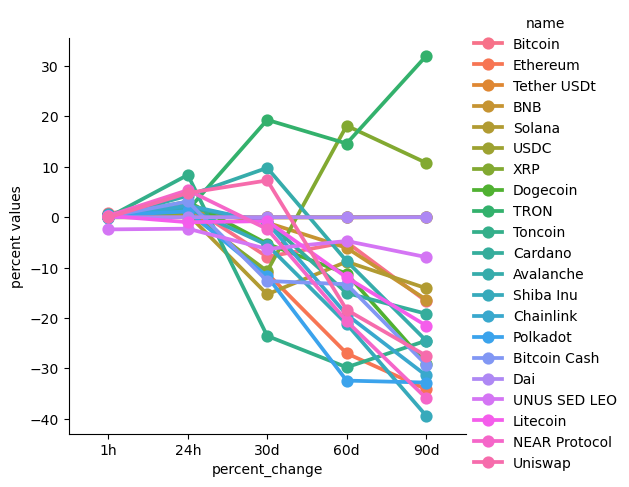

In [153]:
sns.catplot(x='percent_change', y='percent values', hue='name', data=df7, kind='point')

In [179]:
df8 = df15[['name','quote.USD.price', 'timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,55644.61632,2024-09-09 21:03:56.953902
21,Bitcoin,55644.61632,2024-09-09 21:04:57.875704
42,Bitcoin,55711.98374,2024-09-09 21:05:58.389085


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

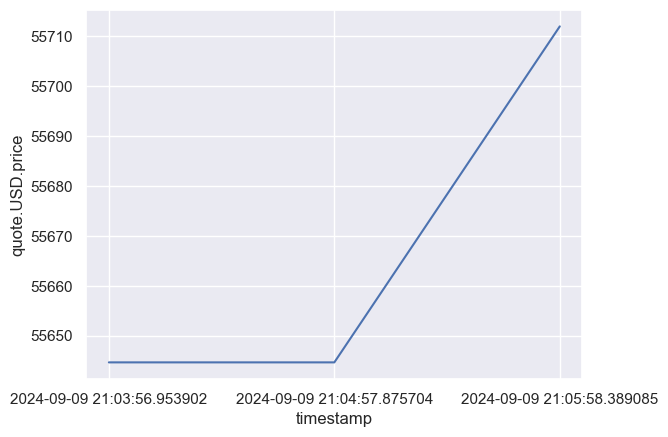

In [183]:
sns.set_theme(style="darkgrid")

sns.lineplot(x="timestamp", y = "quote.USD.price", data= df8)